# Introduction

## This project explores using medical data obtained from cardiotocograms to classify fetal health into one of three categories: normal health, suspected health issue, and pathological issue. The data is obtained via a cardiotocogram exam. These tests are cost effective, simple, and accurate. They measure various fetal health metrics including heart rates, movements, maternal contractions, etc. An ability to accurately predict health concerns could improve fetal and maternal health outcomes and result in cost savings via limiting emergency and invasive interventions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Read csv file into a dataframe.
data = pd.read_csv("/Users/christopherbond/Desktop/fetal_health.csv")

## Feature Description

#### • baseline value: FHR baseline: (beats per minute)
#### • accelerations: Number of accelerations per second
#### • fetal_movement: Number of fetal movements per second
#### • uterine_contractions: Number of uterine contractions per second
#### • light_decelerations: Number of light decelerations per second
#### • severe_decelerations: Number of severe decelerations per second
#### • prolongued_decelerations: Number of prolonged decelerations per second
#### • abnormal_short_term_variability: Percentage of time with abnormal short term variability
#### • mean_value_of_short_term_variability: Mean value of short term variability
#### • percentage_of_time_with_abnormal_long_term_variability: Percentage of time with abnormal long term variability
#### • mean_value_of_long_term_variability: Mean value of long term variability
#### • histogram_width: Width of FHR histogram
#### • histogram_min: Minimum (low frequency) of FHR histogram
#### • histogram_max: Maximum (high frequency) of FHR histogram
#### • histogram_number_of_peaks: Number of histogram peaks
#### • histogram_number_of_zeroes: Number of histogram zeros
#### • histogram_mode: Histogram mode
#### • histogram_mean: Histogram mean
#### • histogram_median: Histogram median
#### • histogram_variance:  Histogram variance
#### • histogram_tendency: Histogram tendency

## Target

#### • fetal_health: Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

In [3]:
#Display first five rows of data just to get a sense of column names and how data looks. 
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


#### All columns contained numerical data and no null values were present. 

In [4]:
#Preliminary exploration of column dtypes and if there are any non-null values. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

#### No dramatic data values of concern were found. When observed mislabelled data or corrupt data is possible. 

In [5]:
# Used described function for analytical overview of data.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


#### Heatmap of correlations for all features. For our target data, the features with the highest correlations are: fetal_health, prolongued_decelerations, abnormal_short_term_variability, percentage_of_time_with_abnormal_long_term_variability, accelerations.  

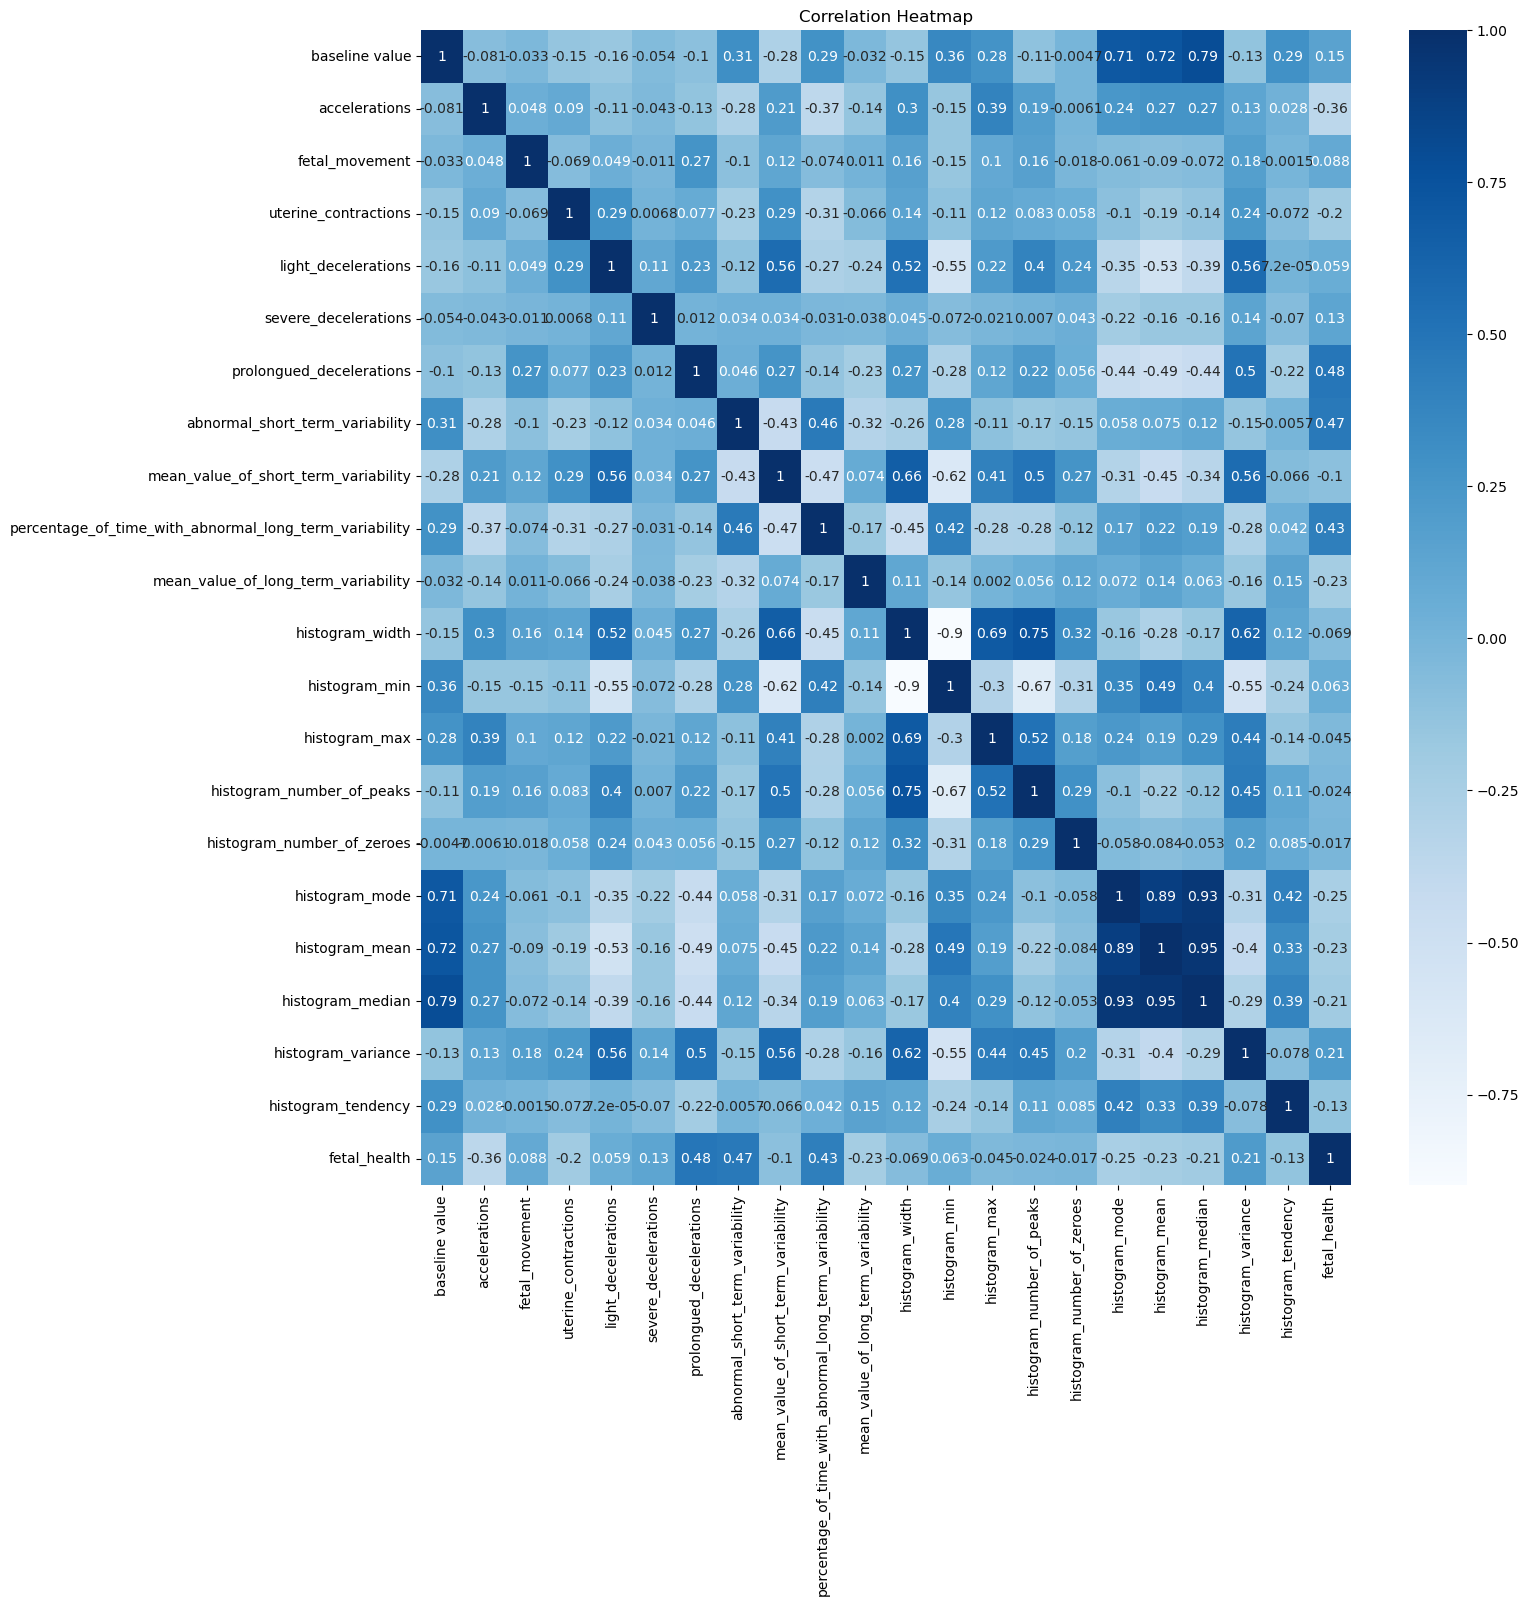

In [6]:
# plotting correlation heatmap 
plt.figure(figsize=(15,15)) 

heatmap = sns.heatmap(data.corr(), cmap = "Blues", annot=True) 
plt.title("Correlation Heatmap")
  
# displaying heatmap 
plt.show() 

In [7]:
#Absolute correlation values for fetal health data which will be our target data. 
corr = data.corr()["fetal_health"]
corr.abs().sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
accelerations                                             0.364066
histogram_mode                                            0.250412
histogram_mean                                            0.226985
mean_value_of_long_term_variability                       0.226797
histogram_variance                                        0.206630
histogram_median                                          0.205033
uterine_contractions                                      0.204894
baseline value                                            0.148151
histogram_tendency                                        0.131976
severe_decelerations                                      0.131934
mean_value_of_short_term_variability                      0.10

#### Histrograms for each feature to determine if any drastic imbalances in the data exist. While beyond the scope of this study, it is interesting that many measurements are zero indicating either the measurement could not be recorded or the feature being measured is infrequent. 

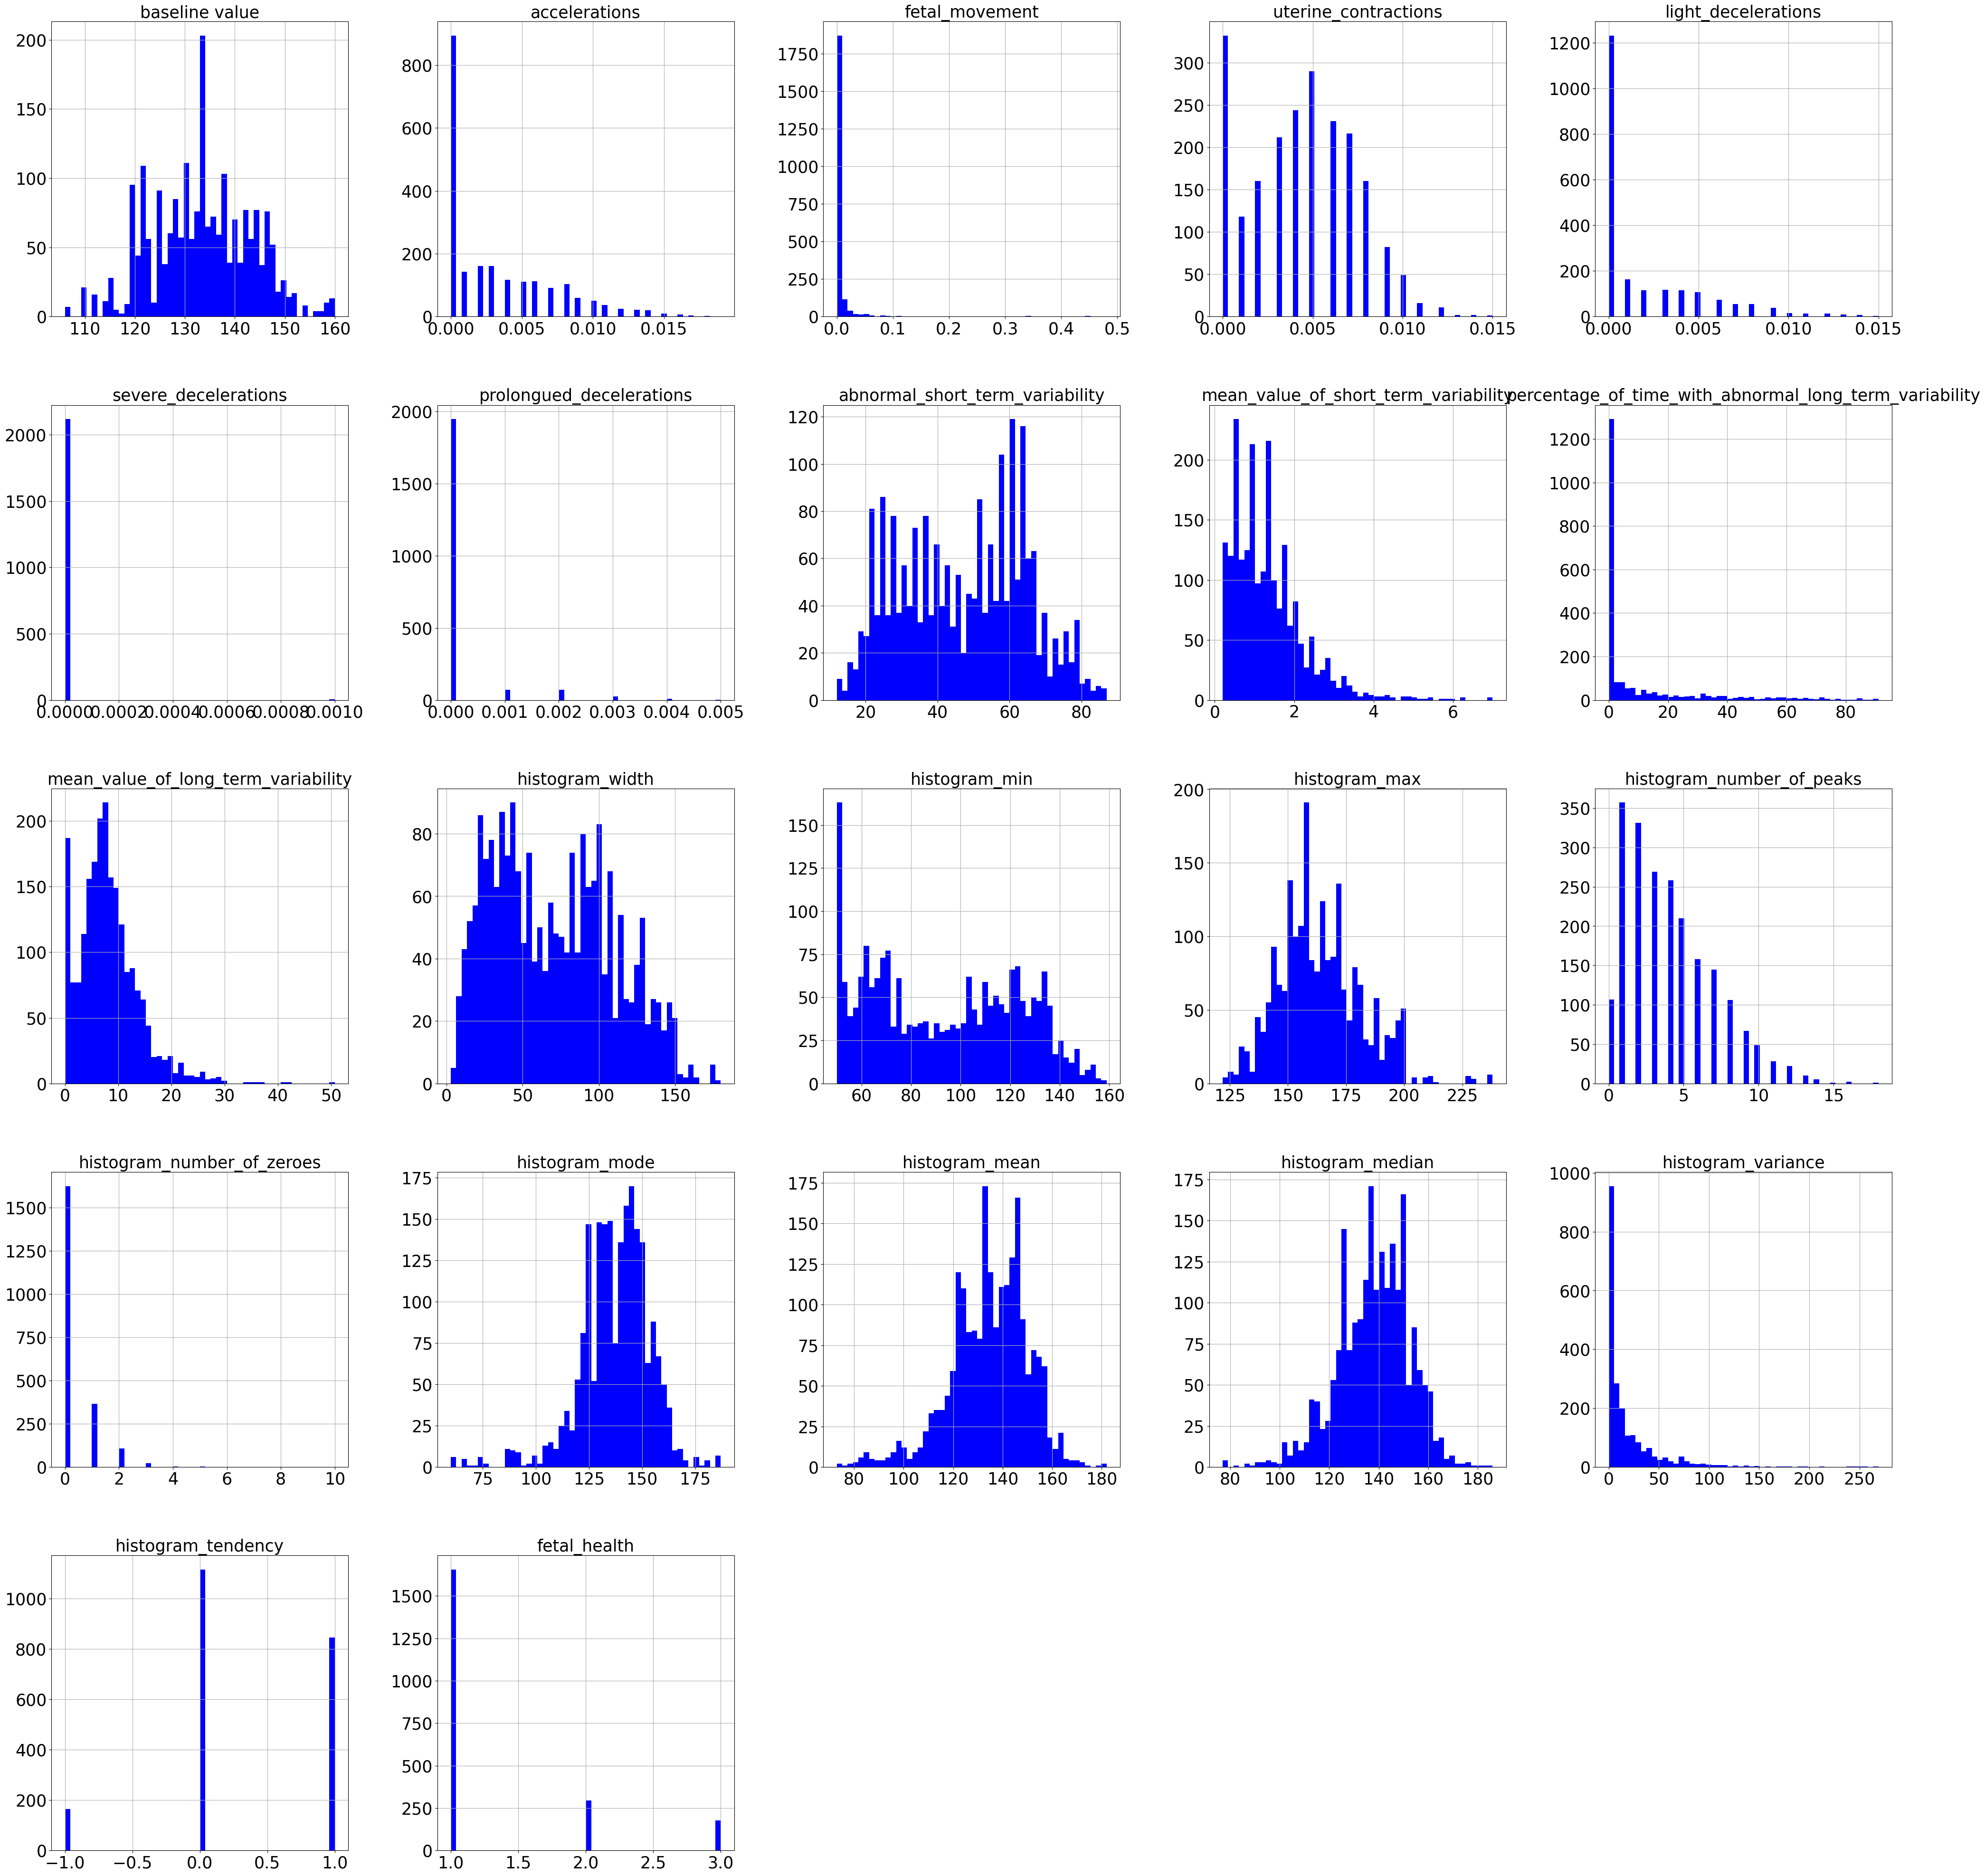

In [8]:
import matplotlib.pyplot as plt

plt.rc('font', size=25)
plt.rc('axes', labelsize=25, titlesize=25)
plt.rc('legend', fontsize=25)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)

# plots histograms of numerical data
data.hist(bins=50, figsize=(50,50), color = "blue")
plt.show()

# Preprocessing of data

In [9]:
# Extract target data fetal_health as y_data
# Drop fetal_health from features as X_data
X_data = data.drop(["fetal_health"],axis=1)
y_data = data["fetal_health"]

In [10]:
#Split data into training data and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X_data,y_data,test_size=0.2,random_state=42)

#### Data pipeline generation...while our current data has zero null values this may not always be the case. The pipeline also scales our data. 

In [11]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Generation of data pipeline with imputer using the median value method for null values and standard scaler.
data_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), 
        ('std_scaler', StandardScaler())])

# Processing of our X_train and X_test data.
X_train_norm = pd.DataFrame(data_pipeline.fit_transform(X_train),columns = X_data.columns)
X_test_norm = pd.DataFrame(data_pipeline.fit_transform(X_test),columns = X_data.columns)

# Training and Evaluating on the Training Set

In [12]:
#Import desired classifiers and instantiate each classifer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

log_class = LogisticRegression(random_state=42)

tree_class = DecisionTreeClassifier(random_state=42)

forest_class = RandomForestClassifier(random_state=42)

svc_class = SVC(random_state=42)

gb_class = GradientBoostingClassifier(random_state=42)

#### Generation of erorr rate to determine optional k-value to be used in model. 

In [13]:
#Generate error rate for KNN algorithm to determine optimal K value.
knn_error = []

for i in range(1,20):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_norm,y_train)
 knn_pred = knn.predict(X_test_norm)
 knn_error.append(np.mean(knn_pred != y_test))

Text(0, 0.5, 'KNN_Error')

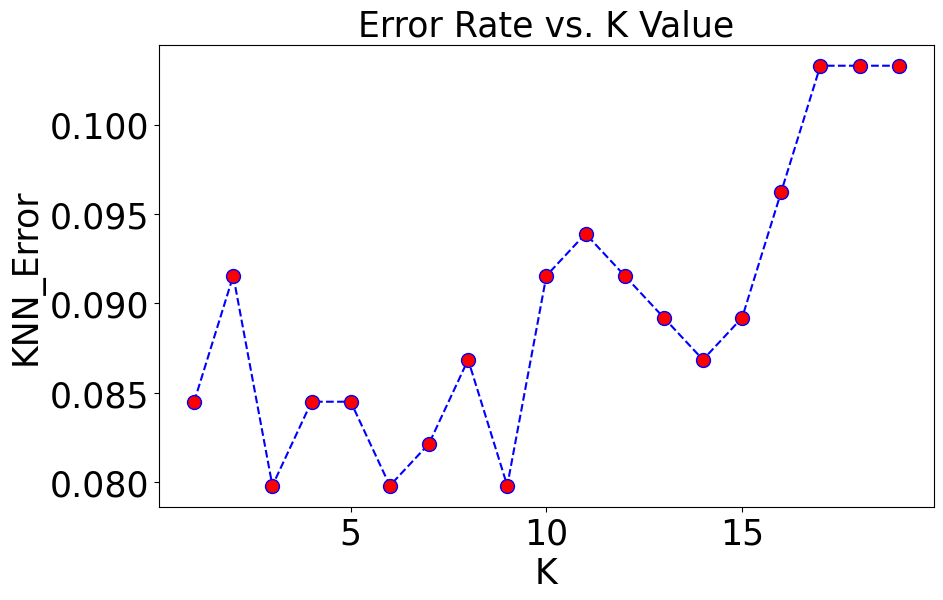

In [14]:
#Generate elbow plot. Where error increases is our k-value

plt.figure(figsize=(10,6))
plt.plot(range(1,20),knn_error,color = 'blue', linestyle = 'dashed', marker ='o',
 markerfacecolor = 'red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('KNN_Error')

In [15]:
#Our n_neighbors is 3
knn_class = neigh = KNeighborsClassifier(n_neighbors=3)

In [16]:
#Generate list of classifiers
classifiers = [log_class, tree_class, forest_class, svc_class, knn_class, gb_class]

In [17]:
#Fit each classifer to our X and y training data
for classifier in classifiers:
    classifier.fit(X_train_norm, y_train)

#### Generation of accuracy scores using cross validation scores to determine promising models. Here GradientBoosting appears best. 

In [18]:
#Generate accuracy scores for each model using cross_val_scores with 3 folds.
#Gradient boost classifier appears to be our best initial model. 
from sklearn.model_selection import cross_val_score

accuracy_scores = []
for classifier in classifiers:
    cv_scores = cross_val_score(classifier, X_train_norm,y_train, cv=3)
    accuracy_scores.append(cv_scores)
    print(classifier, cv_scores.mean())

LogisticRegression(random_state=42) 0.9011660154180766
DecisionTreeClassifier(random_state=42) 0.902943186610246
RandomForestClassifier(random_state=42) 0.9294169091970427
SVC(random_state=42) 0.9041148108678536
KNeighborsClassifier(n_neighbors=3) 0.8917680931815207
GradientBoostingClassifier(random_state=42) 0.9423587870780646


# Tuning the hyperparameters of our Gradient Boost model.

In [19]:
#Perform series of grid searches to tune hyperparameters

# Initial grid search
# parameters = { 
#     'n_estimators': [250,500,750],
#     'learning_rate': [.2,.4,.6],
#     'max_features' : [20,40,60],
# }

#Grid search best parameters {'learning_rate': 0.4, 'max_features': 40, 'n_estimators': 500}

#2nd grid search
# parameters = { 
#     'n_estimators': [350,450,550,650],
#     'learning_rate': [.3,.4,.5],
#     'max_features' : [30,40,50],
# }

# Grid search best parameters {'learning_rate': 0.4, 'max_features': 50, 'n_estimators': 450}

#Generate hyperparameters to be searched.
parameters = { 
    'n_estimators': [400,425,450,475,500],
    'learning_rate': [.4],
    'max_features' : [45,50,55],
}

In [20]:
# Perform grid search using gb_class to determine optimal hyperparameters.
from sklearn.model_selection import GridSearchCV

gb_grid = GridSearchCV(gb_class, parameters, cv=3)
gb_grid.fit(X_train_norm, y_train)

gb_grid.best_params_

{'learning_rate': 0.4, 'max_features': 45, 'n_estimators': 400}

In [21]:
#Instantiate an optimal model using the optimal hyperparamters found in our grid search.
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#Use **gb_grid.best_params_ to generate a model using the optimal hyperparameters from above.
tuned_model = GradientBoostingClassifier(**gb_grid.best_params_)
tuned_model.fit(X_train_norm, y_train)

#Generate predictions on our X_test data using tuned_model. Determine final accuracy score for data. 
tuned_predictions=tuned_model.predict(X_test_norm)
tuned_acccuracy= accuracy_score(y_test,tuned_predictions)
print("Final Accuracy Score:    " + str(tuned_acccuracy))

Final Accuracy Score:    0.9460093896713615


# Final Model Evaluation

In [22]:
#Generate final model accuracy, recall, precision, and f1_scores. 
final_acccuracy = accuracy_score(y_test, tuned_predictions)
final_recall = recall_score(y_test, tuned_predictions, average="weighted")
final_precision = precision_score(y_test, tuned_predictions, average="weighted")
final_f1_score = f1_score(y_test, tuned_predictions, average="micro")

print("Final Accuracy Score:  ", final_acccuracy)
print("Final Recall Score:    ", final_recall)
print("Final Precision Score: ", final_precision)
print("Final F1 Score:        ", final_f1_score)

Final Accuracy Score:   0.9460093896713615
Final Recall Score:     0.9460093896713615
Final Precision Score:  0.9477186635003526
Final F1 Score:         0.9460093896713615


In [23]:
#Print out classification report showing all scoring metrics for each category.
print(classification_report(y_test, tuned_predictions))

              precision    recall  f1-score   support

         1.0       0.98      0.96      0.97       333
         2.0       0.85      0.89      0.87        64
         3.0       0.81      0.86      0.83        29

    accuracy                           0.95       426
   macro avg       0.88      0.91      0.89       426
weighted avg       0.95      0.95      0.95       426



Text(100.72222222222221, 0.5, 'Actual Category')

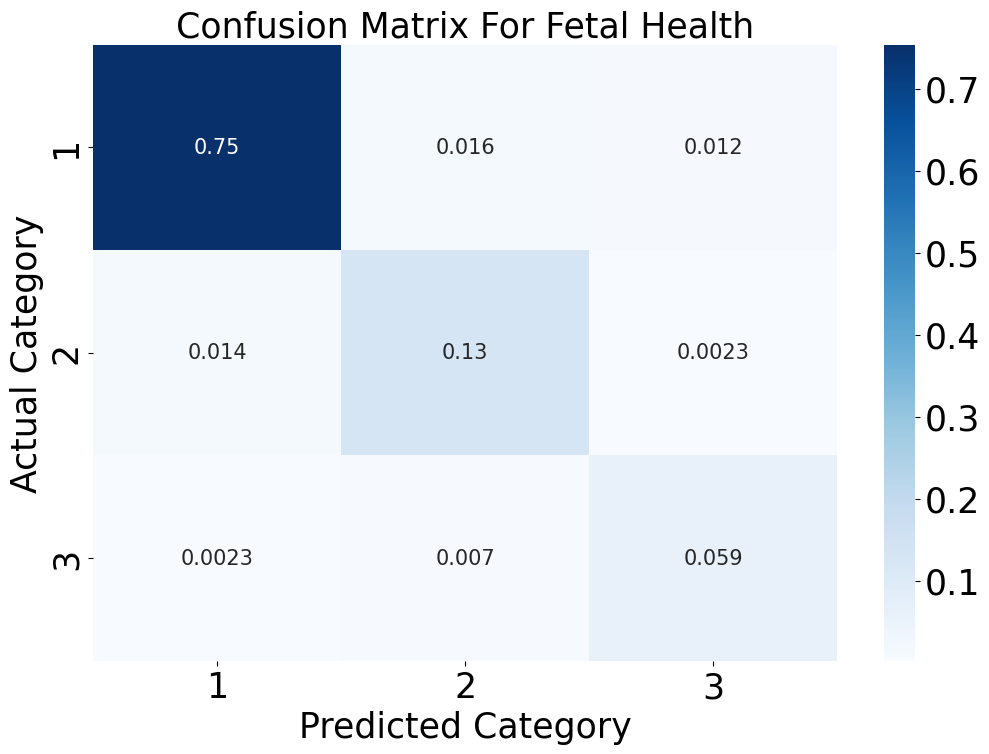

In [24]:
# Confusion matrix plot for our three fetal health categories.
plt.subplots(figsize=(12,8))
x = [1,2,3]
y = [1,2,3]
cf_matrix = confusion_matrix(y_test, tuned_predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap="Blues",annot = True, annot_kws = {'size':15})
plt.title("Confusion Matrix For Fetal Health")
plt.xlabel("Predicted Category")
plt.xticks(ticks = [.5,1.5,2.5], labels = x)
plt.yticks(ticks = [.5,1.5,2.5], labels = y)
plt.ylabel("Actual Category")

# Conclusion

#### An over accuracy, precision, recall, and F1 score of around 95% is shows that our model can utilize data from cardiotocograms in order to predict fetal health. Incorporation of such a model could result in improved maternal and fetal health by allowing reduced interventions in the case of a predicted healthy child, more accurate and faster monitoring of those children for whom there is ause for concern, and rapid and intense interventions where predictions indicate a serious concern. 

#### My suggestion would be to focus on recall in this model assuming the prescribed interventions are minimally risky for the fetus and mother. Considering how overall robust this model is, it is unlikely a healthy fetus will be categorized as having a pathological condition. In addition, the actual patholical fetuses were almost never falsely categorized as a 1. 